### Part 5: K-Means Clustering Algorithm with Elbow Method

In [1]:
import pandas as pd  
import numpy as np

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns

In [2]:
features = [
     #'Channel',
     #'Region',
     'Fresh',
     'Milk',
     'Grocery',
     'Frozen',
     'Detergent',
     'Deli']

In [3]:
df = pd.read_csv(r'C:\Users\hema-sunroom\Desktop\customer_segmentation/data_with_latent.csv', index_col = 0)
data = np.load(r'C:\Users\hema-sunroom\Desktop\customer_segmentation/training_data.npy')

In [4]:
res_kpca = df[['x_kpca_cos', 'y_kpca_cos']].to_numpy()

In [5]:
clusterer = KMeans(n_clusters=5 )
clusters = clusterer.fit_predict(res_kpca)

In [6]:
clusters[:5]

array([3, 1, 1, 0, 2])

In [7]:
markers = list('*hH+xXDd|.,ov^<>12348spP')

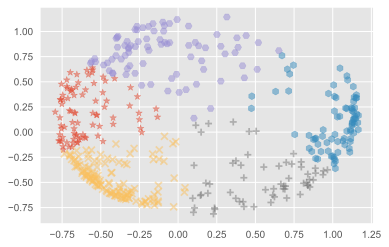

In [8]:
for cluster in np.unique(clusters):
    cluster_data = res_kpca[clusters==cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], 
                alpha=0.5, marker=markers[cluster])

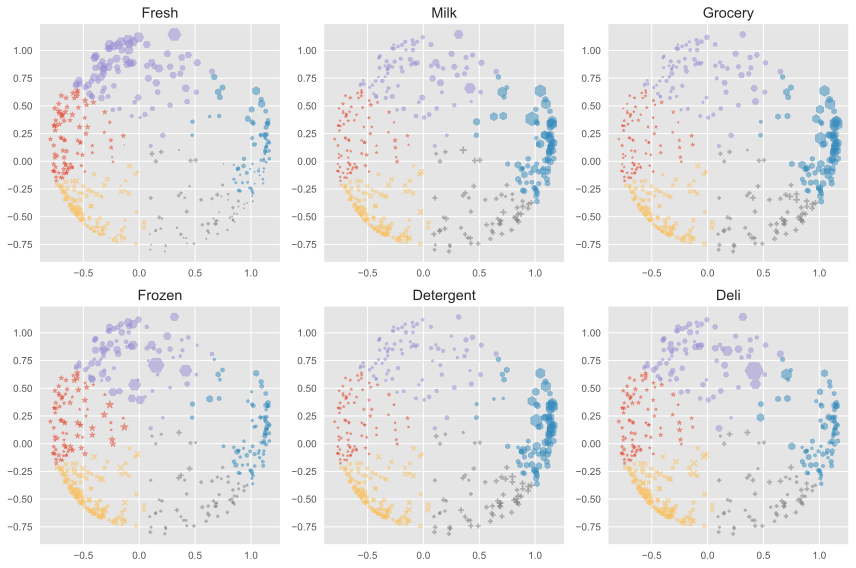

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for feature, ax in zip(features, axes.ravel()):
    cmap = 'viridis'
    for cluster in np.unique(clusters):
        cluster_data = res_kpca[clusters==cluster]
        sizes = 20+20*data[:, features.index(feature)][clusters==cluster]
        ax.scatter(cluster_data[:, 0], cluster_data[:, 1], s=sizes, 
                   alpha=0.5, cmap=cmap, marker=markers[cluster])
    ax.set_title(feature)
plt.tight_layout()

In [10]:
df['cluster_kpca_cos'] = clusters
df.to_csv(r'C:\Users\hema-sunroom\Desktop\customer_segmentation/data_with_clusters.csv')

#### Elbow Method

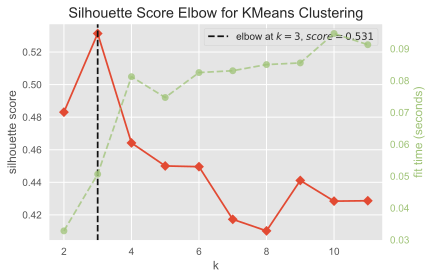

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [11]:
clusterer = KMeans()
visualizer = KElbowVisualizer(clusterer, k=(2, 12), metric='silhouette')

visualizer.fit(res_kpca)        
visualizer.show()